<a href="https://colab.research.google.com/github/fubotz/cl_intro_ws2024/blob/main/HomeExercise2_Fabian_SCHAMBECK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Home Exericse 2: Word Embeddings
In this second home exercise, you will use the knowledge from Tutorial 3 to perform a more systematic evaluation of embeddings based on a small analogy dataset.

In this notebook, please complete all instructions starting with 👋 ⚒ in the code cell after the sign or provide your analysis in the text cell after the sign.

## **Word2Vec Analogy-based Evaluation**

We first need to load the pretrained embeddings and the dataset. The dataset can be found on [GitHub](https://github.com/dgromann/cl_intro_ws2024/blob/main/exercises/HomeExercise2.txt) and will be loaded directly from there.

In [1]:
!wget https://github.com/dgromann/cl_intro_ws2024/raw/main/word2vec_embeddings.bin
!wget !wget https://raw.githubusercontent.com/dgromann/cl_intro_ws2024/master/exercises/HomeExercise2.txt

--2024-11-25 18:08:23--  https://github.com/dgromann/cl_intro_ws2024/raw/main/word2vec_embeddings.bin
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dgromann/cl_intro_ws2024/main/word2vec_embeddings.bin [following]
--2024-11-25 18:08:24--  https://raw.githubusercontent.com/dgromann/cl_intro_ws2024/main/word2vec_embeddings.bin
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96769269 (92M) [application/octet-stream]
Saving to: ‘word2vec_embeddings.bin’

word2vec_embeddings 100%[===================>]  92.29M   208MB/s    in 0.4s    

2024-11-25 18:08:24 (208 MB/s) - ‘word2vec_embeddings.bin’ saved

Then we need to load the model with gensim so that we can access the embeddings.

In [2]:
import gensim

word2vec_model = gensim.models.KeyedVectors.load_word2vec_format("word2vec_embeddings.bin", binary=True)     # load pre-trained Word2Vec embeddings in binary format --> .bin == binary encoded file

And we need to open the HomeExercise2.txt file that contains analogy pairs.

In [3]:
analogy = open("HomeExercise2.txt", "r")
analogy_lines = analogy.readlines()     # .readlines() method used to read lines and return them as list of strings; each string represents a line from file


# NB: anology:
# A : B :: C : D

To look at the first few lines, the following code can be used. The analogies are grouped by categories that is indicated on the line before the anlogies are listed with a colon :. The last and fourth element of the line represents the true result we will use to evaluate the embedding model.

In [4]:
line_no = 0
for line in analogy_lines:
    line_no += 1
    print(f"Line number {line_no} with analogy {line}")
    if line_no == 5:
        break

Line number 1 with analogy : capital-common-countries

Line number 2 with analogy Athens Greece Baghdad Iraq

Line number 3 with analogy Athens Greece Berlin Germany

Line number 4 with analogy Athens Greece Cairo Egypt

Line number 5 with analogy Athens Greece Canberra Australia



👋 ⚒ Systematically evaluate this simple word embedding model based on the entire analogy dataset. To do this:


*   Use the analogy function from Tutorial 3 to obtain 'd'
*   Compare 'd' with the true result from the `HomeExercise2.txt` file
*   Calculate the accuracy for all analogies (how many times out of all attempts did the embedding model provide the correct result)
*   Calculate the accuracy for each analogy category separately

When parsing the file, pay attention to the lines indicated with the colon : that represent the analogy categories and not analogies.


In [15]:
# Your code here:
# Example: Athens is to Greece as Baghdad is to ?
# True result from file: Iraq
# Model result: also Iraq?


def analogy(model, a, b, c):        # refactored: added model as parameter; added Error Handling if Key not present in model
    try:
        result = model.most_similar(positive=[b, c], negative=[a], topn=1)      # calculate the analogy: b - a + c = d
        return result[0][0]
    except KeyError:
        return None     # return None if any of the words are not in the vocabulary


def run_analysis(model, model_name):        # refactored: added function with parameters model, model_name
    # Initialize variables to track accuracy of prediction
    total_attempts = 0      # tracks total number of analogies attempted
    total_correct = 0       # total number of correctly predicted analogies
    category_attempts = {}      # dict to track total number of attempts for each category
    category_correct = {}       # dict to track total number of correct predictions for each category

    with open("HomeExercise2.txt", "r") as file:
        current_category = None     # track current analogy category

        for line in file:
            line = line.strip()

            # Check if the line is a category header
            if line.startswith(":"):
                current_category = line[1:].strip()     # extract category name without colon at index [0]
                # Initialize counters for the new category
                category_attempts[current_category] = 0
                category_correct[current_category] = 0

            else:
                # Split the other lines into sperate strings (a, b, c, d_true)
                words = line.split()

                if model_name == "GloVe":       # refactored: added lowercase for GloVe model (only)
                    words = [word.lower() for word in words]

                if len(words) == 4:     # if number of words per line == 4
                    a, b, c, d_true = words     # assign a, b, c, d_true respectively to each word in that line

                    # Use the analogy function to get the predicted result
                    predicted_d = analogy(model, a, b, c)

                    # Update overall counts
                    if predicted_d is not None:     # refactored: only if the prediction was made (word was found in vocabulary of the model)
                        total_attempts += 1
                        category_attempts[current_category] += 1

                        if predicted_d == d_true:
                            total_correct += 1
                            category_correct[current_category] += 1

    # Calculate and print overall accuracy
    overall_accuracy = total_correct / total_attempts if total_attempts > 0 else 0      # if-statement avoids division by 0
    print(f"Overall accuracy of the {model_name} model: {overall_accuracy:.2f}")

    # Calculate and print category-specific accuracies
    for category, attempts in category_attempts.items():        # category_attempts: dict{category_name : number_of_attempts}
        correct = category_correct[category]
        accuracy = correct / attempts if attempts > 0 else 0
        print(f"Accuracy for {category} ({model_name} model): {accuracy:.2f}")


run_analysis(word2vec_model, "Word2Vec")

Overall accuracy of the Word2Vec model: 0.75
Accuracy for capital-common-countries (Word2Vec model): 0.87
Accuracy for capital-world (Word2Vec model): 0.90
Accuracy for currency (Word2Vec model): 0.00
Accuracy for city-in-state (Word2Vec model): 0.79
Accuracy for family (Word2Vec model): 0.93
Accuracy for gram1-adjective-to-adverb (Word2Vec model): 0.30
Accuracy for gram2-opposite (Word2Vec model): 0.54
Accuracy for gram3-comparative (Word2Vec model): 0.91
Accuracy for gram4-superlative (Word2Vec model): 0.88
Accuracy for gram5-present-participle (Word2Vec model): 0.78
Accuracy for gram6-nationality-adjective (Word2Vec model): 0.96
Accuracy for gram7-past-tense (Word2Vec model): 0.69
Accuracy for gram8-plural (Word2Vec model): 0.87
Accuracy for gram9-plural-verbs (Word2Vec model): 0.68


In [22]:
print(analogy(word2vec_model, "Athens", "Greece", "Baghdad"))       # Greece(b) - Athens(a) + Baghdad(c) = Iraq(d); outputs d == "Iraqi" because analogy relies on word embeddings from pre-trained model; uppercase!
print(analogy(word2vec_model, "mother", "father", "aunt"))       # father(b) - mother(a) + aunt(c) = uncle(d)

Iraqi
uncle


## **Evaluation Word2Vec:**

The results show that the model achieved an overall accuracy of 75%, meaning it correctly resolved three-quarters of the analogies. Categories with particularly high accuracy rates which stand out due to their high performance include "capital-world", "family" and "gram6-nationality-adjective". The Word2Vec model is case-sensitive; here it is important to enter proper names with an initial uppercase letter.

## **Comparison: GloVe Analogy-based Evaluation**

The next step will consist of comparing this very small word2vec embedding model with a different small but more powerfull model available in gensim.

All models and corpora available in gensim can be found [here](https://github.com/piskvorky/gensim-data).

Since this model is considerably bigger than the tiny word2vec model, it takes some time to load when you run the following code cell.

In [19]:
import gensim.downloader as api
from gensim.models import KeyedVectors

glove_model = api.load("glove-wiki-gigaword-100")       # Question: Why as api?
print(type(glove_model))

<class 'gensim.models.keyedvectors.KeyedVectors'>


The model can then be used exactly the same as the word2vec model, since gensim standardizes model access.

In [20]:
glove_model["bread"]


# NB:
# print(len(model_glove["bread"]))      # output: 100

array([-0.66146  ,  0.94335  , -0.72214  ,  0.17403  , -0.42524  ,
        0.36303  ,  1.0135   , -0.14802  ,  0.25817  , -0.20326  ,
       -0.64338  ,  0.16632  ,  0.61518  ,  1.397    , -0.094506 ,
        0.0041843, -0.18976  , -0.55421  , -0.39371  , -0.22501  ,
       -0.34643  ,  0.32076  ,  0.34395  , -0.7034   ,  0.23932  ,
        0.69951  , -0.16461  , -0.31819  , -0.34034  , -0.44906  ,
       -0.069667 ,  0.35348  ,  0.17498  , -0.95057  , -0.2209   ,
        1.0647   ,  0.23231  ,  0.32569  ,  0.47662  , -1.1206   ,
        0.28168  , -0.75172  , -0.54654  , -0.66337  ,  0.34804  ,
       -0.69058  , -0.77092  , -0.40167  , -0.069351 , -0.049238 ,
       -0.39351  ,  0.16735  , -0.14512  ,  1.0083   , -1.0608   ,
       -0.87314  , -0.29339  ,  0.68278  ,  0.61634  , -0.088844 ,
        0.88094  ,  0.099809 , -0.27161  , -0.58026  ,  0.50364  ,
       -0.93814  ,  0.67576  , -0.43124  , -0.10517  , -1.2404   ,
       -0.74353  ,  0.28637  ,  0.29012  ,  0.89377  ,  0.6740

👋 ⚒  Run the same systematic analysis for this gensim model as for the word2vec model above. Which model performs better overall and in specific categories?

In [21]:
# Your code here:

run_analysis(glove_model, "GloVe")

Overall accuracy of the GloVe model: 0.62
Accuracy for capital-common-countries (GloVe model): 0.91
Accuracy for capital-world (GloVe model): 0.94
Accuracy for currency (GloVe model): 0.00
Accuracy for city-in-state (GloVe model): 0.31
Accuracy for family (GloVe model): 0.90
Accuracy for gram1-adjective-to-adverb (GloVe model): 0.25
Accuracy for gram2-opposite (GloVe model): 0.25
Accuracy for gram3-comparative (GloVe model): 0.79
Accuracy for gram4-superlative (GloVe model): 0.62
Accuracy for gram5-present-participle (GloVe model): 0.70
Accuracy for gram6-nationality-adjective (GloVe model): 0.98
Accuracy for gram7-past-tense (GloVe model): 0.58
Accuracy for gram8-plural (GloVe model): 0.83
Accuracy for gram9-plural-verbs (GloVe model): 0.56


In [23]:
print(analogy(glove_model, "athens", "greece", "baghdad"))       # greece(b) - athens(a) + baghdad(c) = iraq(d); lowercase!
print(analogy(glove_model, "mother", "father", "aunt"))       # father(b) - mother(a) + aunt(c) = uncle(d)

iraq
uncle


## **Evaluation GloVe:**

The results show that the overall performance of the GloVe model (0.62%) is
worse compared to the Word2Vec model (0.75%). Additionally, Word2Vec outperformed GloVe in 10 out of 14 categories. GloVe only performed better in three categories: capital-common-countries, capital-world and Gram6-nationality-adjective. For the GloVe model, it is important to enter everyting in lowercase.

## **Visual Comparison**

As a final step, use the visualization from Tutorial 3 to visually output the two models based on the following words.

👋 ⚒  ❓ Do the clusters (groupings of embeddings) in the GloVe visualization differ substantially from the clusters in the word2vec visualization from Tutorial 3?

In [24]:
import numpy as np

from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

def display_pca_scatterplot(model, words):

    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]

    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

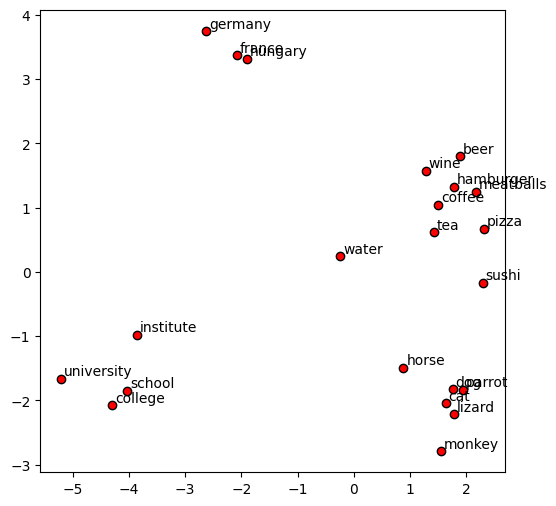

In [25]:
display_pca_scatterplot(glove_model,
                        ['coffee', 'tea', 'beer', 'wine', 'water',
                         'hamburger', 'pizza',  'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'lizard',
                         'france', 'germany', 'hungary',
                         'school', 'college', 'university', 'institute'])

**Provide your answer to the question on the clusters here.**

## **Bias in Embeddings**

Language models and also embedding models tend to reflect on bias that is present in the textual data they were trained on. This can also be analyzed with embeddings by explicitly testing biased analogies.

For instance, man is to doctor as woman is to ?

The bias here is that professions tend to be assigned a specific gender, e.g. men are doctors and women are nurses.

The same is true for cultures and cultural bias, e.g. Bratwurst or Sauerkraut and Germany.



In [ ]:
result1 = model_glove.most_similar(positive=["doctor", "woman"], negative=["man"], topn=3)
print(f"man is to doctor as woman is to {result1}")
result2 = model_glove.most_similar(positive=["bratwurst", "france"], negative=["germany"], topn=3)
print(f"Germany is to Bratwurst as France is to {result2}")

👋 ⚒ Try to come up with two biased analogies yourself and test if the GloVe and word2vec models suffers from this type of bias. Please try to be creative and do not just change woman to girl and man to boy or something similar.

In [ ]:
# Test your biased analogies on both models here